In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

data_path='./Data/'
df=pd.read_csv(data_path+'titanic_train.csv')

train_Y=df['Survived']
df=df.drop(['PassengerId','Survived'],axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
import warnings
warnings.filterwarnings('ignore')
LEncoder=LabelEncoder()
MMEncoder=MinMaxScaler()
for c in df.columns:
    df[c]=df[c].fillna(-1)
    if df[c].dtypes=='object':
        df[c]=LEncoder.fit_transform(list(df[c].values))
    df[c]=MMEncoder.fit_transform(df[c].values.reshape(-1,1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [19]:
train_X=df.values
train_X,test_X,train_Y,test_Y=train_test_split(train_X,train_Y,test_size=0.5)
train_X,val_X,train_Y,val_Y=train_test_split(train_X,train_Y,test_size=0.5)

In [20]:
#D32-1
rf = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=5, max_features=4, max_depth=3, bootstrap=True)
onehot=OneHotEncoder()
lr=LogisticRegression(solver='lbfgs',max_iter=1000)
rf.fit(train_X,train_Y)
onehot.fit(rf.apply(train_X))
lr.fit(onehot.transform(rf.apply(val_X)),val_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
pred_rf_lr=lr.predict_proba(onehot.transform(rf.apply(test_X))[:,0])
fpr_rf_lr,tpr_rf_lr,_=roc_curve(test_Y,pred_rf_lr)
pred_rf=rf.predict_proba(test_X)
fpr_rf,rpr_rf,_=roc_curve(test_Y,pred_rf)

ValueError: X has 1 features per sample; expecting 147

NameError: name 'fpr_rf' is not defined

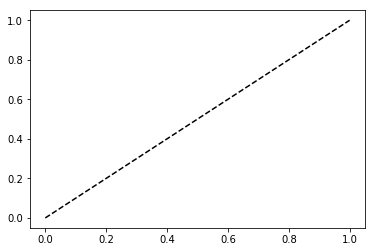

In [16]:
#D32-2
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot(fpr_rf_lr,tpr_rf_lr,label='RF_LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive reate')
plt.legend(loc='best')
plt.show()